In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from object_map_registration.object.ellipsoid import Ellipsoid
from robot_utils.robot_data.pose_data import PoseData


In [2]:
bag = "/home/masonbp/data/motlee_jan_2024/00/RR08.bag"
pose_data = PoseData(
    data_file=bag,
    file_type='bag',
    topic="/RR08/world",
    time_tol=.4,
    interp=True,
    t0=0.0
)

In [8]:
pkl_path = "/home/masonbp/results/west_point_2023/segment_tracking/motlee_jan_merge_pt5.pkl"
with open(pkl_path, "rb") as f:
    tracker = pickle.load(f)

cam_params = tracker.camera_params


In [9]:
boxes = np.array([
    [2.33, -2.03],
    [2.16, -1.65],
    [4.2, 0.5],
    [4.48, 1.73],
    [5.05, 3.24],
    [5.42, 3.43],
    [2.28, 1.94],
    [1.98, 2.19],
    [0.41, 2.39],
    [0.07, 2.64],
    [1.03, .48],
    [-1., 1.63],
    [-.86, -1.42],
    [-.33, -1.83],
    [-.73, -1.97],
    [-0.3, -3.46],
    [-1.79, 0.5],
    [-1.89, 1.13],
    [-2.86, 2.74],
    [-2.61, 2.78],
    [-3.37, 0.67],
    [-3.03, 0.19],
    [-2.36, -1.52],
])

1.8951840369631336
0.4211945572149691
15.151373810507486
0.11239682295530261
0.012122662512221135
0.3243234615187892
0.2982520660401234
0.26567154865679254
0.32381370606569004
0.40188764753082845
0.12528615930418374
0.25024079720838793
0.10201271380307256
0.03434305059934877
0.02489915432637382
0.36366562814998254
0.17307140986322528
0.1268410941988605
0.24026900562234002
0.24306002445202834
0.03499405500382177
0.2732548698722506
0.15363172189353616
0.41238816021957975
0.1903092029938511
0.11917403282999361


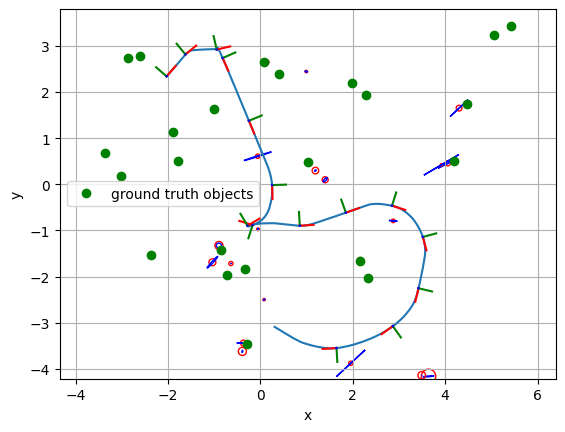

In [14]:
fig, ax = plt.subplots()
ax.plot(boxes[:,0], boxes[:,1], 'go', label='ground truth objects')
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
for segment in tracker.segments + tracker.segment_graveyard:
    segment.camera_params = cam_params
    # try:
    # reconstruction = segment.reconstruction3D(width_height=True)
    reconstruction = segment.reconstruction3D(width_height=True)
    ellipsoid = Ellipsoid(reconstruction[:2], axes=np.array([reconstruction[3]/2, reconstruction[3]/2]), rot_mat=np.eye(2))

    cov = segment.covariance[:2,:2]
    # print(cov)
    print(np.sqrt(np.max(np.linalg.eigh(cov)[0])))
    if np.sqrt(np.max(np.linalg.eigh(cov)[0])) > .5:
        continue
    ellipsoid.plot2d(ax, edgecolor='r')
    pearson = cov[0,1] / np.sqrt(cov[0,0]*cov[1,1])
    cov_ellipse = Ellipsoid(reconstruction[:2], axes=np.array([3*np.sqrt(cov[0,0]*(1 + pearson)), 3*cov[1,1]*np.sqrt(1 - pearson)]), rot_mat=cov[:2,:2])
    cov_ellipse.plot2d(ax, edgecolor='b')
    # ax.plot(position[0], position[1], 'bx')
    # except:
    # print("missed this one")
pose_data.plot2d(t0=100, tf=130)
pose_data.plot2d(t0=100, tf=130, pose=True, dt=2., axis_len=.3, trajectory=False)
plt.legend()
# seg = tracker.segment_graveyard[10]
# reconstruction = reconstruction3D(seg, width_height=True)
# object = Object(reconstruction[:2])
# object.plot2d(ax)